### Model LDA All

In [1]:
import pandas as pd
import concurrent.futures
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
# Fungsi untuk menerapkan model LDA pada data yang telah diproses
def apply_lda(processed_texts):
    def fit_lda(processed_text):
        vectorizer = CountVectorizer()
        X = vectorizer.fit_transform(processed_text)

        lda = LatentDirichletAllocation(n_components=5, random_state=42)
        lda.fit(X)

        return lda, vectorizer, X

    with concurrent.futures.ThreadPoolExecutor() as executor:
        results = executor.map(fit_lda, [processed_texts])

    return list(results)[0]

# Fungsi untuk membuat word cloud
def create_wordcloud(lda_model, vectorizer):
    # Ambil 10 kata kunci dari setiap topik
    keywords_per_topic = 10
    topics_keywords = []
    for index, topic in enumerate(lda_model.components_):
        top_words_indices = topic.argsort()[-keywords_per_topic:]
        top_words = [vectorizer.get_feature_names_out()[i] for i in top_words_indices]
        topics_keywords.append(top_words)
    
    # Gabungkan kata kunci dari semua topik menjadi satu teks
    all_keywords = ' '.join([word for sublist in topics_keywords for word in sublist])
    
    # Buat word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_keywords)
    
    # Tampilkan word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# Fungsi untuk membuat grafik Distribusi Jumlah Dokumen per Topik
def plot_doc_distribution(lda_model, X):
    doc_topic_distribution = lda_model.transform(X)
    doc_topics = doc_topic_distribution.argmax(axis=1)
    
    plt.figure(figsize=(10, 5))
    plt.hist(doc_topics, bins=len(set(doc_topics)), color='skyblue', edgecolor='black', alpha=0.7)
    plt.title('Distribusi Jumlah Dokumen per Topik')
    plt.xlabel('Topik')
    plt.ylabel('Jumlah Dokumen')
    plt.xticks(range(len(set(doc_topics))))
    plt.show()

# Fungsi untuk membuat grafik Distribusi Probabilitas Topik per Dokumen
def plot_topic_prob_distribution(lda_model, X):
    doc_topic_distribution = lda_model.transform(X)
    
    plt.figure(figsize=(10, 5))
    for i in range(lda_model.n_components):
        plt.hist(doc_topic_distribution[:,i], bins=30, alpha=0.5, label=f'Topik {i+1}')
    plt.title('Distribusi Probabilitas Topik per Dokumen')
    plt.xlabel('Probabilitas')
    plt.ylabel('Jumlah Dokumen')
    plt.legend()
    plt.show()

In [3]:
df = pd.read_csv('pre_content_cek.csv')
print(len(df))

51880


In [4]:
df.head(10)

,url_berita,nama_berita,tanggal_berita,processed_text
0,https://20.detik.com/advertorial/20231109-2311...,Detik News,10-11-2023,maha barudak wellyuk ramai pesta anak nongkron...
1,https://20.detik.com/demi-indonesia/20231027-2...,Detik News,27-10-2023,menteri bumn erick thohir bicara bangsa indone...
2,https://20.detik.com/detikupdate/20231001-2310...,Detik News,01-10-2023,sekjen pdip hasto kristiyanto bicara kait kaba...
3,https://20.detik.com/demi-indonesia/20231027-2...,Detik News,27-10-2023,raih emas olimpiade tokyo greysia polii bicara...
4,https://20.detik.com/detikupdate/20231001-2310...,Detik News,01-10-2023,gempa kuat 54 guncang sukabumi jawa barat gemp...
5,https://20.detik.com/demi-indonesia/20231027-2...,Detik News,27-10-2023,kapolri jenderal lisyto sigit prabowo bicara s...
6,https://20.detik.com/detikupdate/20231001-2310...,Detik News,01-10-2023,menko polhukam mahfud md buka suara temu 12 se...
7,https://20.detik.com/detikupdate/20231001-2310...,Detik News,01-10-2023,tum pkb muhaimin iskandar cak imin bicara duga...
8,https://20.detik.com/detikupdate/20231001-2310...,Detik News,01-10-2023,sekjen pdip hasto kristiyanto benar ganjar pra...
9,https://20.detik.com/detikupdate/20231001-2310...,Detik News,01-10-2023,kpk ungkap oknum hilang barang bukti duga kait...


In [5]:
df.dropna(subset=['processed_text'], inplace=True)

In [6]:
# Apply LDA model with multithreading
lda_model, vectorizer, X = apply_lda(df['processed_text'])

In [7]:
print("Topik dari model LDA:")
for index, topic in enumerate(lda_model.components_):
    print(f"Topik {index+1}:")
    top_words_indices = topic.argsort()[-10:]  # Ubah menjadi 10 kata kunci per topik
    top_words = [vectorizer.get_feature_names_out()[i] for i in top_words_indices]
    print(top_words)

Topik dari model LDA:
Topik 1:
['calon', 'debat', 'presiden', 'nomor', 'mk', 'tahun', 'putus', 'milu', 'indonesia', 'pilih']
Topik 2:
['rumah', 'bangun', 'tahun', 'kendara', 'masyarakat', 'kota', 'warga', 'tni', 'jalan', 'jakarta']
Topik 3:
['anak', 'temu', 'polisi', 'rp', 'uang', 'sangka', 'jakarta', 'duga', 'laku', 'korban']
Topik 4:
['ketua', 'syahrul', 'jaya', 'polda', 'metro', 'periksa', 'duga', 'jakarta', 'firli', 'kpk']
Topik 5:
['ketua', 'dukung', 'israel', 'indonesia', 'ganjar', 'gibran', 'partai', 'jokowi', 'prabowo', 'presiden']


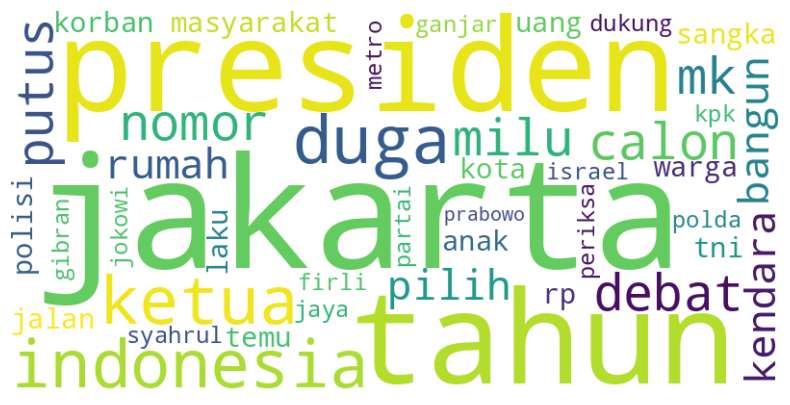

In [8]:
create_wordcloud(lda_model, vectorizer)

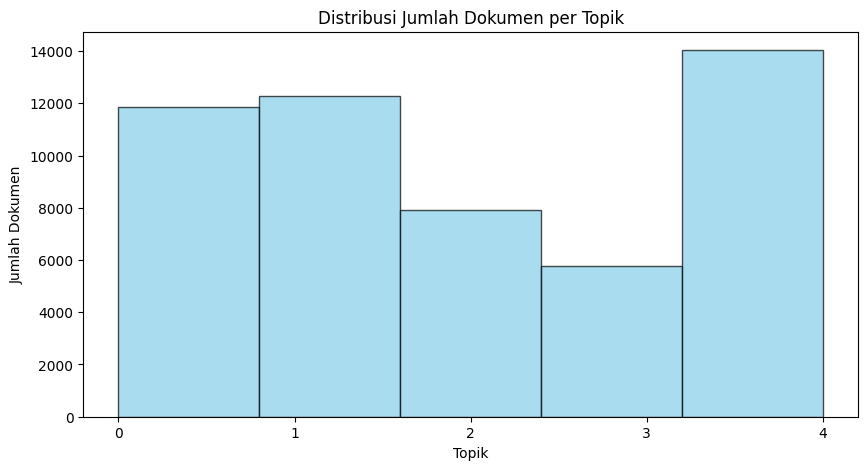

In [9]:
plot_doc_distribution(lda_model, X)

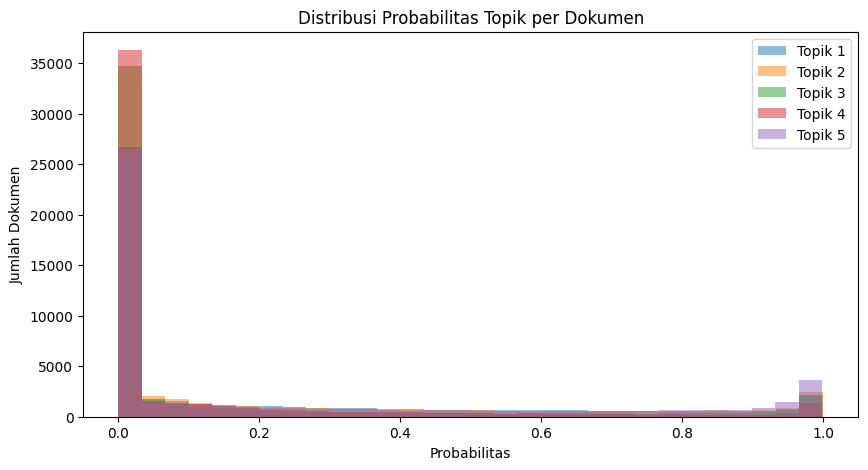

In [10]:
# Plot Distribusi Probabilitas Topik per Dokumen
plot_topic_prob_distribution(lda_model, X)